# AIT590 - Lab 1
### By Melissa Cirtain,  June 6, 2021

In [1]:
import nltk
import wordcloud

! pip freeze | grep nltk

nltk==3.4


### Task 1 (5 points): Text Preprocessing and Basic Analysis with NLTK

In [2]:
# 1.1 (0 points) Load one text file. 

filepath = '/Users/melissacirtain/Documents/gmu/AIT590-NLP/IndividualLab1/harry_potter_book_1.txt'
with open(filepath, 'r', encoding='utf-8') as f:
    text = f.read()
text[:40]

"Harry Potter and the Sorcerer's Stone \n\n"

In [3]:
# 1.2 (1 point) Tokenize sentences and words. Print lens of sentences and tokens and only print
# the first 20 words.
# Credits: https://stackoverflow.com/questions/10467024/how-do-i-create-my-own-nltk-text-from-a-text-file
# https://www.guru99.com/tokenize-words-sentences-nltk.html

from nltk.tokenize import word_tokenize, sent_tokenize

word_tokens = word_tokenize(text)
print(f'Number of words: {len(word_tokens)}')

sent_tokens = sent_tokenize(text)
print(f'Number of sentences: {len(sent_tokens)}')

print(word_tokens[:20])

Number of words: 98848
Number of sentences: 6394
['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


In [4]:
# 1.3 (1 point) Remove punctuations. Only print the first 20 words.
# Credits: https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer
# http://www.nltk.org/book/ch01.html
# https://stackoverflow.com/questions/23317458/how-to-remove-punctuation

import string
punct = string.punctuation
print(punct)

#words = [x.lower() for x in word_tokens if x.isalpha()]  <-- no
#words = [x.lower() for x in word_tokens if x not in punct]  <-- no

# Backing up, first removing punctuation from original text, convert back list->str; then tokenizing:
words =  " ".join("".join([" " if x in punct else x.lower() for x in text]).split())
words = word_tokenize(words)

print(f'Number of words after removing punctuation and tokenizing: {len(words)}')
print(words[:20])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Number of words after removing punctuation and tokenizing: 80674
['harry', 'potter', 'and', 'the', 'sorcerer', 's', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four']


In [5]:
# 1.4 (1 point) Remove stop words and count the distinct cleaned words.
# Credits: http://www.nltk.org/book/ch02.html

from nltk.corpus import stopwords
from collections import defaultdict

stopwords = nltk.corpus.stopwords.words('english')

# remove stopwords
important_words = [x.lower() for x in words if x.lower() not in stopwords]  # 5629

# set up a counting dictionary - keys are unique lowercased words
word_counts = defaultdict(int)
for w in important_words:
    word_counts[w] += 1

print(f'Number of distinct cleaned (lowercased, remove punctuation) words without stopwords: {len(word_counts.keys())}')
print(f'Number of cleaned, lowercased words without stopwords:  {len(important_words)}')
print(important_words[:20])

Number of distinct cleaned (lowercased, remove punctuation) words without stopwords: 5629
Number of cleaned, lowercased words without stopwords:  40805
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']


In [6]:
# 1.5 (1 point) Lemmatize the cleaned words and count the distinct lemmatized words. What’s
# different from 1.4? Please clearly explain.
# Credits: http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

lemmatized_words = [wnl.lemmatize(x) for x in important_words]
print(f'Number of distinct cleaned, lemmatized words: {len(set(lemmatized_words))}')
print(lemmatized_words[:20])

Number of distinct cleaned, lemmatized words: 5110
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mr', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']


#### What's the difference in count in 1.5 vs 1.4?

In 1.4 we were counting the cleaned words in their original form, sans punctuation.  But in 1.5 we _lemmatize_ the words, so plurals (for instance) are counted as the same word as singular instances; words are boiled down to their root lemmas, so a number of distinct non-lemmatized words are reduced to a smaller number of lemmas.

Length of our lemmatized vocabulary: 5110
[('harry', 1327), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 270), ('one', 269), ('back', 264), ('know', 233), ('got', 207), ('get', 203), ('could', 198), ('like', 195), ('see', 181), ('professor', 181), ('snape', 172)]


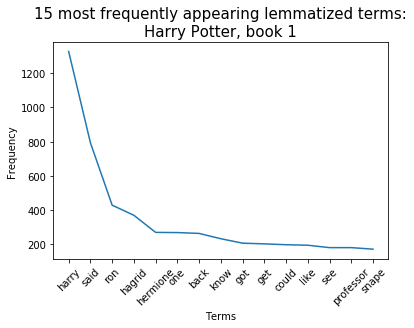

In [7]:
# 1.6 (1 point) Calculate the word distribution and plot and list only top 15 words.
vocab = nltk.FreqDist(lemmatized_words)
print(f'Length of our lemmatized vocabulary: {len(vocab)}')
print(vocab.most_common(15))

# Plot 15-most-frequent terms
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(*zip(*vocab.most_common(15)))
plt.title('15 most frequently appearing lemmatized terms:\nHarry Potter, book 1', size=15)
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Task 2 (4 points): Word Clouds

(-0.5, 399.5, 199.5, -0.5)

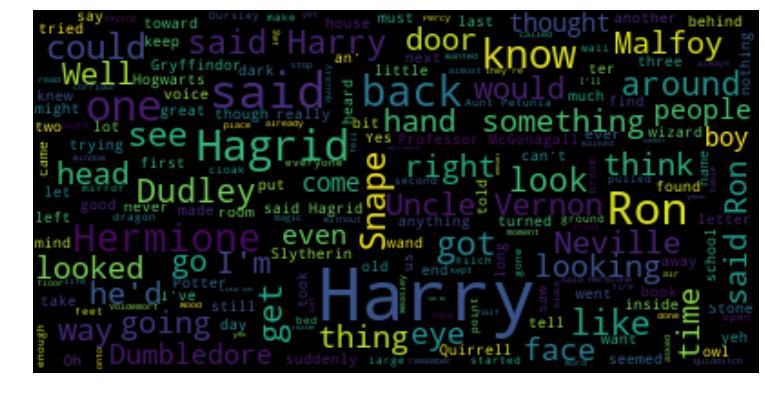

In [8]:
# 2.1 (1.5 points) Follow the wordcloud simple example to generate the word cloud without
# stopwords directly from the original text and show it. Note that you must remove the
# stopwords.

# Hint: Use WordCloud(stopwords=STOPWORDS).generate(mytext).

from wordcloud import WordCloud

''' EXAMPLE:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
'''

wc = WordCloud(stopwords=stopwords, max_font_size=40).generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

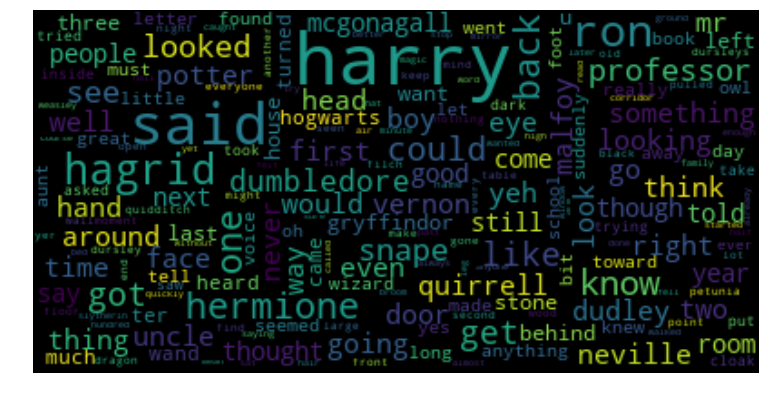

In [9]:
# 2.2 (1.5 points) Generate the word cloud for the processed data in Task 1 and show the image.
# Hint: Use WordCloud().generate_from_frequencies(freq_dist). Note that freq_dist is the output of
# FreqDist(). 

wc_vocab = WordCloud(max_font_size=40).generate_from_frequencies(vocab)
plt.figure(figsize=(13,13))
plt.imshow(wc_vocab, interpolation='bilinear')
plt.axis("off")

#### 2.3 (1 point) Compare the above two word clouds and what difference do you find? Please clearly explain why.

In the first word cloud, I see _phrases_, such as "said Harry", "said Ron", etc.  Because of this, some terms appear more than once.  There are also contractions, which we do not expect in our cleaned, lemmatized data.

But in the second word cloud, based on the cleaned, lemmatized, tokenized and lowercased words, I do not see phrases.  All of the words are lowercased, as expected.  Each word token appears only once, and its size is proportionate to its frequency in the document.

### Task 3 (1 point):
Please answer the following questions:
3.1 Based on your experience with these NLP tasks, please compare with text data processing
and numeric data processing.

Text data processing is _much_ harder for me than numeric data processing.  I used NLTK briefly two years ago, but I did not use it to the extent required for Lab 1, and I suppose I had forgotten a good deal of it.  

- There are nuances in wrangling and cleaning the text data that I don't notice in the numeric data transformations.  

- At times the order matters a lot, and you can't just use parentheses to adjust the order of operations the way I might in a numeric solution and expect it to still be a readable operation.  

- Perhaps after working for a year or two with NLTK and other NLP libraries it will become more intuitive to me.  I hope so.